#  <font   color = 'red'>Part I  how to install matplot library</font>

##### <font color = 'red'>Author FengZeng Aug,2023</font>
<font  face ='黑体'>一、需要的相关库</font>
相关库和版本如下图所示，可以从Pypi网站进行下载：
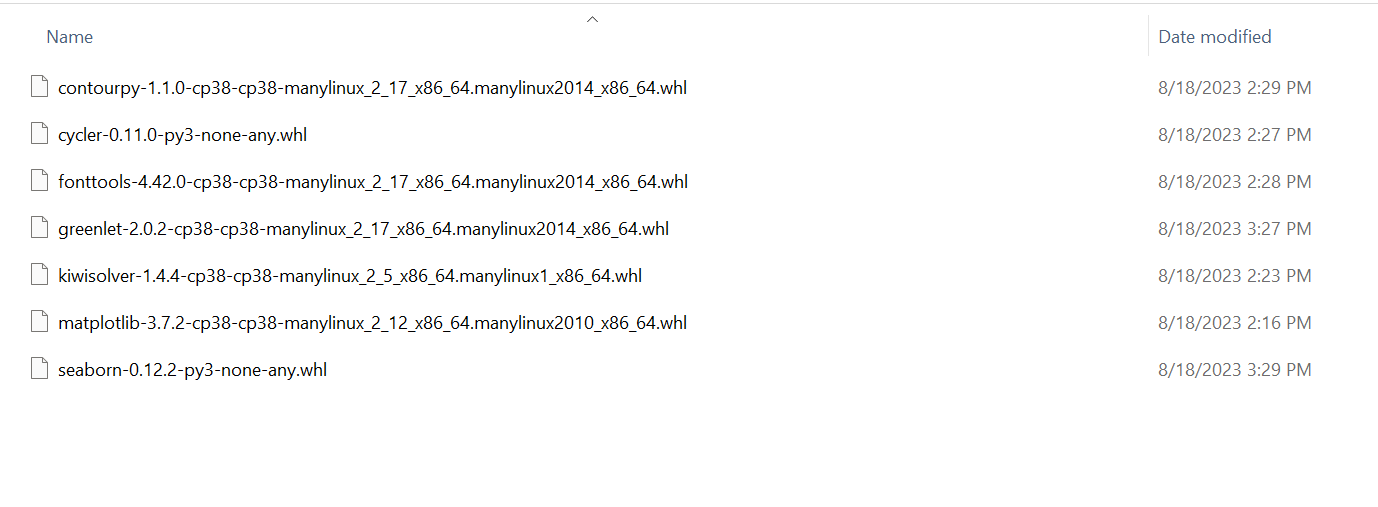

<font  face ='黑体'>二、上传下载的相关库包到平台</font>


<font color ='red' face ='黑体'>作者已将相关包上传至公共网盘</font>
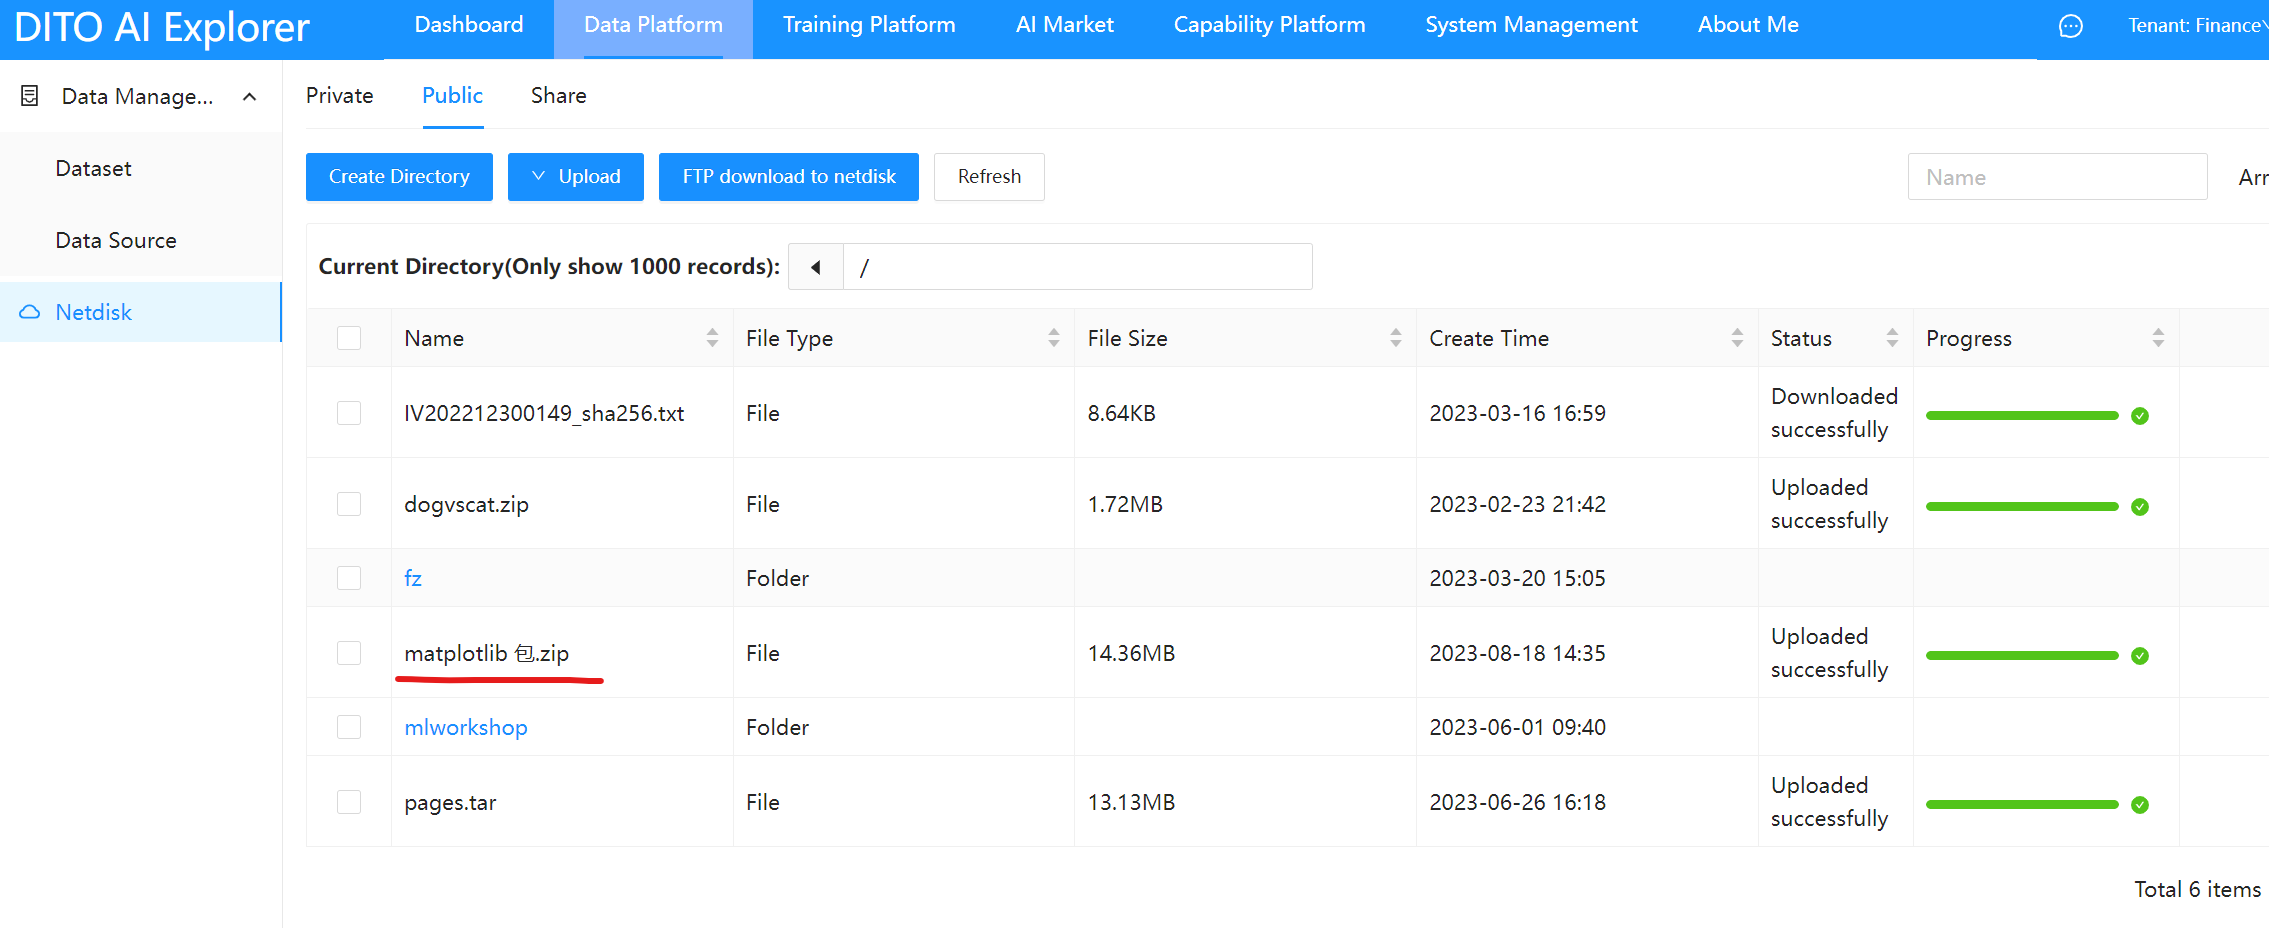

上传文件和安装库包的相关步骤请参考手册如下：

 
1.	AI平台jupyter notebook环境安装
虚拟环境
在使用jupyter notebook时，为了确保项目的依赖包版本一致性，并使不同的项目之间隔离依赖关系，需要启用虚拟环境。以下是准备虚拟环境的流程:
创建虚拟环境
（1）打开在训练平台-模型训练-工作区中，打开jupyter notebook：
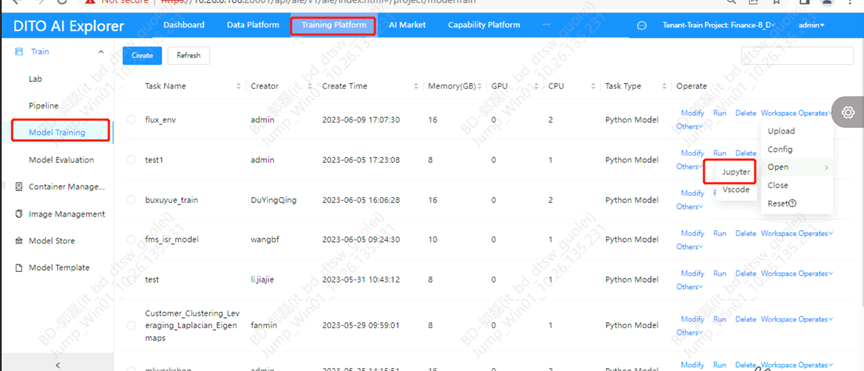
（2）上传所需要的安装包文件pages到jupyter notebook的工作区，点击upload：
 pages.tar文件在数据源-网盘-公共中，点击下载到本地
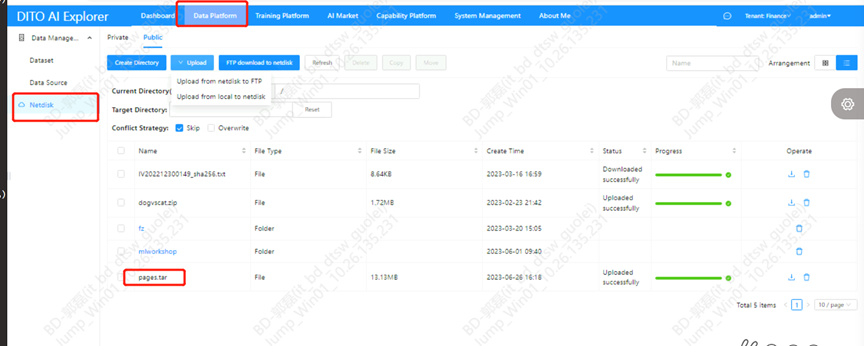
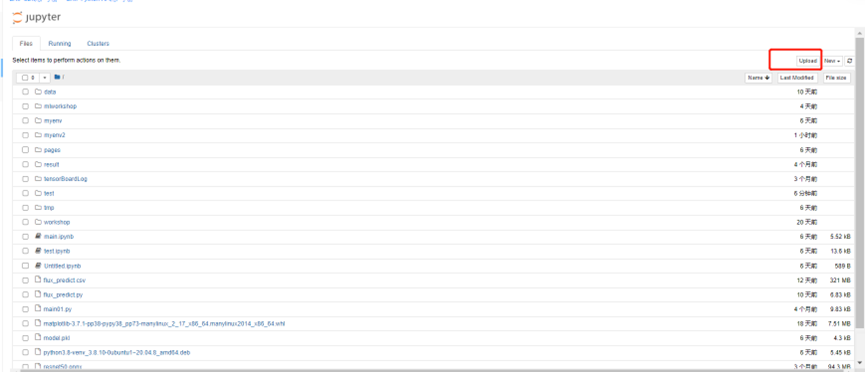

（3）进入到jupyter notebook后台：
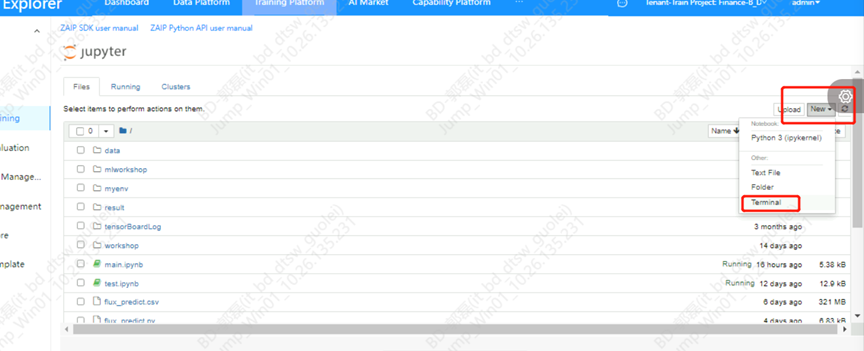

 
（4）进入到jupyter notebook目录：
    cd /mnt/notebooks
（5）安装pages目录下的包：
    tar -xvf pages.tar
    cd  pages
    pip install *.whl 
（6）创建虚拟环境。运行命令：
    mkdir  myenv
    virtualenv myenv
若报错可以运行命令 “pip list”查看virtualenv是否在环境中，并再次执行命令:
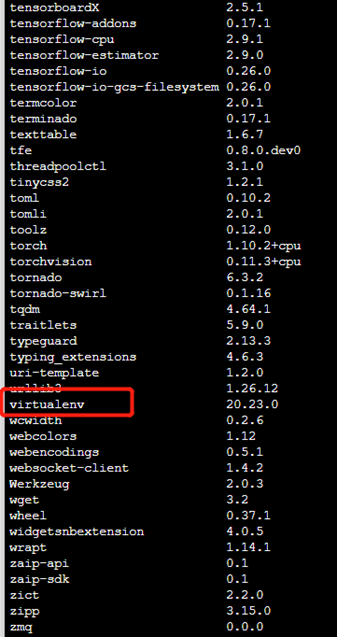 
（7）激活虚拟环境：在Linux/Mac上，使用以下命令激活虚拟环境：
chmod +x myenv/bin/activate
. myenv/bin/activate
（8）下载安装包：在本机或者其他服务器（具有网络环境）上下载所需的Python包及其依赖项。可以使用pip命令来下载包，例如：
pip download package_name
（9）将下载的包及其依赖项复制到AI平台上，点击upload进行传输：
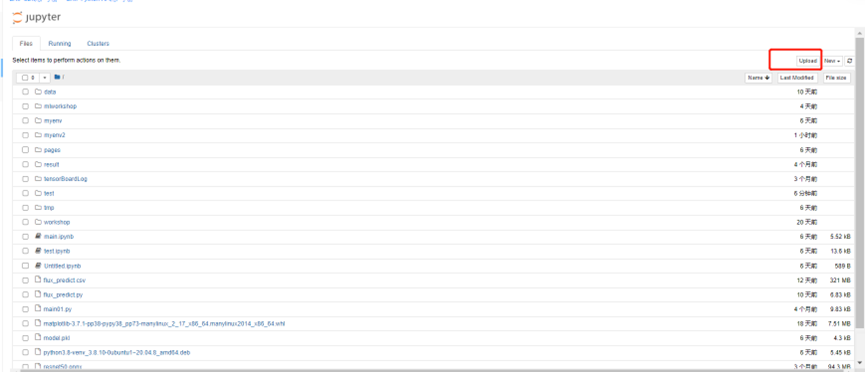 
（10）使用pip命令进行安装：
pip install   *.whl
激活虚拟环境
要在Jupyter Notebook中激活虚拟环境，需要更改内核（kernel），请按照以下步骤操作：
（1）启动Jupyter Notebook服务并打开Jupyter Notebook界面。
（2）在Jupyter Notebook界面中，选择你要更改内核的Notebook文件。
（3）点击菜单栏中的"Kernel"选项。
（4）在"Kernel"下拉菜单中，选择你想要使用的内核。如果你想要创建一个新的虚拟环境并将其作为内核，确保在此步骤之前已经创建了相应的虚拟环境。
（5）Jupyter Notebook将使用所选的内核来执行Notebook中的代码。
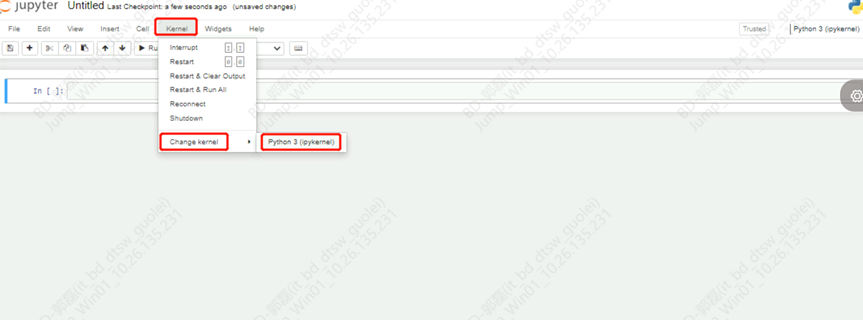 
请注意，你需要在系统中安装并配置好所需的内核，以便在Jupyter Notebook中进行选择。你可以使用ipykernel包来安装和配置新的内核。以下是创建和安装新内核的基本步骤：
（1）在终端或命令行界面中，激活你想要在Jupyter Notebook中使用的虚拟环境。
使用pip安装ipykernel包：
pip install ipykernel
（2）将虚拟环境添加到Jupyter Notebook的内核列表中：
Python3 -m ipykernel install --user --name=myenv --display-name "My Environment"
将myenv替换为你的虚拟环境的名称，My Environment替换为你想要在Jupyter Notebook中显示的内核名称。
完成上述步骤后，你将能够在Jupyter Notebook中选择和使用新创建的内核。


2.	AI平台脚本部署
环境准备
在准备AI平台脚本部署的环境时，使用Docker可以提供一个方便且一致的环境，以确保你的应用在不同的系统上运行稳定。以下是使用Docker准备环境的流程：
在服务器上安装Docker：
（1）打开终端。
（2）使用包管理器（如apt、yum或dnf）来更新系统软件包列表和依赖项。执行以下命令之一：
	对于Ubuntu或Debian系统：
sudo apt update
	对于CentOS或Fedora系统：
sudo yum update
（3）安装Docker的依赖项。执行以下命令：
sudo apt install docker.io  # Ubuntu/Debian
sudo yum install docker    # CentOS/Fedora
（4）启动Docker服务。执行以下命令：
sudo systemctl start docker

制作python环境镜像：
（1）创建Dockerfile：在您的项目根目录下创建一个名为Dockerfile的文件，该文件将描述如何构建Docker镜像。
（2）编写Dockerfile：在Dockerfile中，需要指定基础映像、添加应用程序文件、设置工作目录和安装所需的依赖项等，下面是一个Dockerfile的示例：
```
# code block 
FROM python:3.9
ADD . /home/gl
# Update apt sources to use  mirror
RUN echo '[global]\nindex-url = https://pypi.tuna.tsinghua.edu.cn/simple' > /etc/pip.conf
RUN sed -i 's/archive.ubuntu.com/mirrors.tuna.tsinghua.edu.cn/g' /etc/apt/sources.list

# install OpenSSH
RUN apt-get update && apt-get install -y openssh-server

#config  SSH
RUN mkdir /var/run/sshd
RUN echo 'root:password' | chpasswd
RUN sed -i 's/#PermitRootLogin prohibit-password/PermitRootLogin yes/' /etc/ssh/sshd_config

# Set the health check command
HEALTHCHECK --interval=10s --timeout=5s CMD echo "heart check success." || exit 1

# Install Python dependencies
RUN pip install -r /home/gl/requirements.txt
EXPOSE 22

# start SSH server
CMD ["/usr/sbin/sshd", "-D"]
```


（3）构建Docker镜像：在终端或命令提示符中，运行以下命令来构建Docker镜像：     
                 docker build -t  your_image_name .
此命令将基于Dockerfile构建一个名为"your_image_name"的镜像。确保在命令的末尾有一个句点，以指示Docker使用当前目录作为上下文。
（4）运行Docker容器：构建镜像成功后，可以启动容器。使用以下命令：
               docker run your_image_name
这将启动一个基于您的镜像运行的容器，如果容器成功运行，则可以将镜像打包。
（4）保存镜像：打开终端，并执行以下命令来保存镜像为一个文件：
docker save -o  your_image_name.tar your_image_name:latest

模型部署
部署至AI平台：
（1）上传镜像：在训练平台-镜像管理中点击导入镜像，选择制作好的镜像上传到平台，等待镜像上传成功：
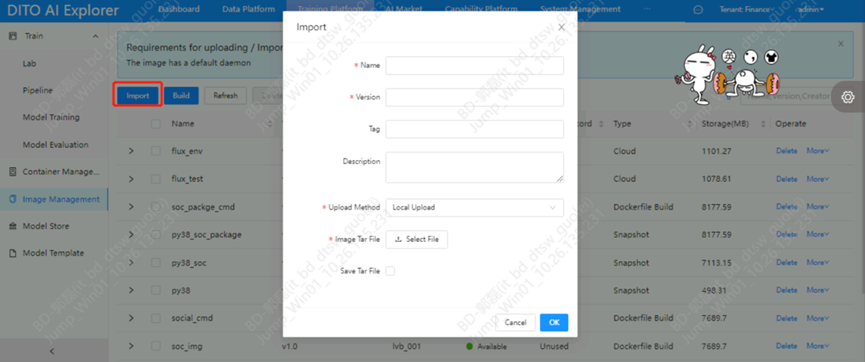
（2）模型部署：点击训练平台-模型训练，点击新建，填好配置，一个可参考的配置如图所示,其中镜像选择刚刚导入的镜像，入口点输入python3，参数输入脚本名称
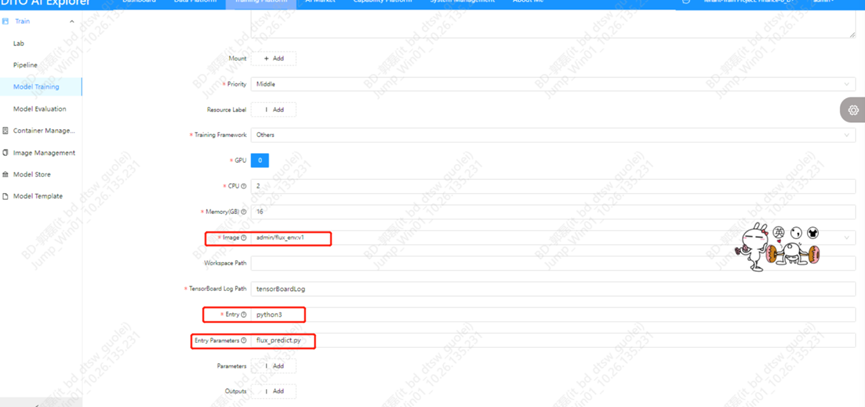 
（3）模型启动：点击运行，即可启动脚本。
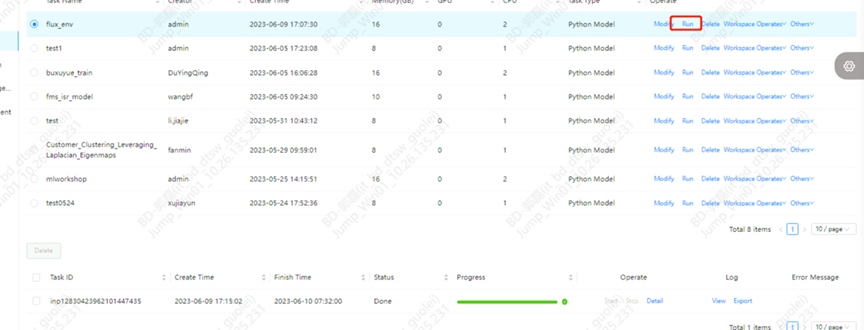 

 



















# <font color = 'red'>Part II  how to use open model from web</font>


##### <font color = 'red'>Author FengZeng Aug,2023</font>
<font  face ='黑体'>一、上传从模型库下载的models</font>
比如，我从Pytorch官网下载了图像分类模型RESNET152，并上传至自己的环境中
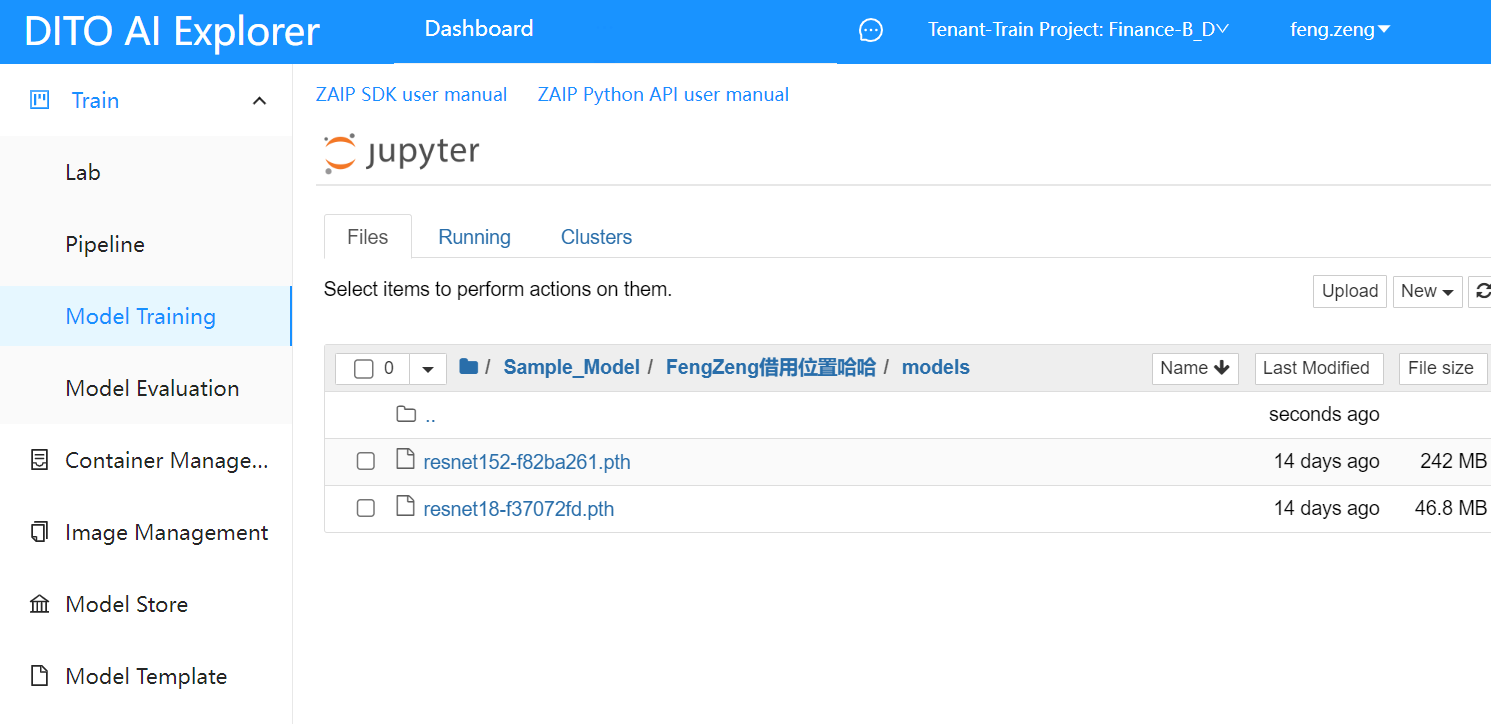

<font  face ='黑体'>二、新建代码段使用models</font>

***<font color = 'red'>1、加载必备的Pytorch库 </font>***


```
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.models as models


from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor


import captum
from captum.attr import IntegratedGradients, Occlusion, LayerGradCam, LayerAttribution
from captum.attr import visualization as viz

import os, sys
import json

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

#from torchvision import prototype as P

```

***<font color = 'red'>2、加载models </font>***

```

modelv1 = models.resnet18() 
modelv1.load_state_dict(torch.load('models/resnet18-f37072fd.pth'))
modelv1.eval()

modelv2 = models.resnet152() 
modelv2.load_state_dict(torch.load('models/resnet152-f82ba261.pth'))
modelv2.eval()


```

***<font color = 'red'>3、加载需要判别的图片 </font>***

```

test_img = Image.open('datesets/banana.jpg')
test_img_data = np.asarray(test_img)
plt.imshow(test_img_data)
plt.show()

```

***<font color = 'red'>4、图片识别 </font>***

```
# model expects 224x224 3-color image
transform = transforms.Compose([
 transforms.Resize(224),
 transforms.CenterCrop(224),
 transforms.ToTensor()
])

# standard ImageNet normalization
transform_normalize = transforms.Normalize(
     mean=[0.485, 0.456, 0.406],
     std=[0.229, 0.224, 0.225]
 )

transformed_img = transform(test_img)
input_img = transform_normalize(transformed_img)
input_img = input_img.unsqueeze(0) # the model requires a dummy batch dimension

labels_path = 'datesets/imagenet_class_index.json'
with open(labels_path) as json_data:
    idx_to_labels = json.load(json_data)

output = modelv1(input_img)
output = F.softmax(output, dim=1)
prediction_score, pred_label_idx = torch.topk(output, 1)
pred_label_idx.squeeze_()
predicted_label = idx_to_labels[str(pred_label_idx.item())][1]
print('Predicted:', predicted_label, '(', prediction_score.squeeze().item(), ')')


output = modelv2(input_img)
output = F.softmax(output, dim=1)
prediction_score, pred_label_idx = torch.topk(output, 1)
pred_label_idx.squeeze_()
predicted_label = idx_to_labels[str(pred_label_idx.item())][1]
print('Predicted:', predicted_label, '(', prediction_score.squeeze().item(), ')')


imgs = ['datesets/cat.jpg', 
        'datesets/flower.jpg',
        'datesets/banana.jpg']

for img in imgs:
    img = Image.open(img)
    transformed_img = transform(img)
    input_img = transform_normalize(transformed_img)
    input_img = input_img.unsqueeze(0) # the model requires a dummy batch dimension

    output = modelv1(input_img)
    output = F.softmax(output, dim=1)
    prediction_score, pred_label_idx = torch.topk(output, 1)
    pred_label_idx.squeeze_()
    predicted_label = idx_to_labels[str(pred_label_idx.item())][1]
    print('model18:Predicted:', predicted_label, '/', pred_label_idx.item(), ' (', prediction_score.squeeze().item(), ')')
    

print("\r")
    
for img in imgs:
    img = Image.open(img)
    transformed_img = transform(img)
    input_img = transform_normalize(transformed_img)
    input_img = input_img.unsqueeze(0) # the model requires a dummy batch dimension

    output = modelv2(input_img)
    output = F.softmax(output, dim=1)
    prediction_score, pred_label_idx = torch.topk(output, 1)
    pred_label_idx.squeeze_()
    predicted_label = idx_to_labels[str(pred_label_idx.item())][1]
    print('model152:Predicted:', predicted_label, '/', pred_label_idx.item(), ' (', prediction_score.squeeze().item(), ')')
    
```



In [2]:
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")    
    x= torch.ones(4,4)
    # a CUDA 设备对象
    y = torch.ones_like(x, device=device)  # 直接从GPU创建张量
    x = x.to(device)                       # 或者直接使用``.to("cuda")``将张量移动到cuda中
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` 也会对变量的类型做更改

tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]], device='cuda:0')
tensor([[2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.],
        [2., 2., 2., 2.]], dtype=torch.float64)


In [3]:
print(torch.cuda.is_available())

True


In [2]:
#查看显卡信息
!nvidia-smi

Wed May  8 15:53:28 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.06              Driver Version: 545.23.06    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-PCIE-32GB           Off | 00000000:66:00.0 Off |                    0 |
| N/A   33C    P0              26W / 250W |      0MiB / 32768MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--